In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt

In [2]:
df = pd.read_csv('filtered_vessel_data.csv')

In [3]:
df

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
0,538007181,2024-01-01T00:00:00,32.61859,-118.21503,10.7,255.5,255.0,LEICESTER,IMO9792266,V7XE6,80.0,0.0,333.0,60.0,13.7,80.0,A
1,538007181,2024-01-01T00:01:11,32.61773,-118.21916,10.9,253.7,255.0,LEICESTER,IMO9792266,V7XE6,80.0,0.0,333.0,60.0,13.7,80.0,A
2,538007181,2024-01-01T00:02:19,32.61685,-118.22330,10.9,257.2,255.0,LEICESTER,IMO9792266,V7XE6,80.0,0.0,333.0,60.0,13.7,80.0,A
3,538007181,2024-01-01T00:03:20,32.61617,-118.22657,11.0,256.0,255.0,LEICESTER,IMO9792266,V7XE6,80.0,0.0,333.0,60.0,13.7,80.0,A
4,538007181,2024-01-01T00:04:29,32.61526,-118.23072,10.9,256.2,255.0,LEICESTER,IMO9792266,V7XE6,80.0,0.0,333.0,60.0,13.7,80.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,538007181,2024-01-03T02:52:43,28.79316,-117.03968,16.0,141.7,144.0,LEICESTER,IMO9792266,V7XE6,80.0,0.0,333.0,60.0,11.0,80.0,A
2513,538007181,2024-01-03T03:02:13,28.75962,-117.01112,15.9,143.1,145.0,LEICESTER,IMO9792266,V7XE6,80.0,0.0,333.0,60.0,11.0,80.0,A
2514,538007181,2024-01-03T03:03:26,28.75495,-117.00720,15.9,144.0,145.0,LEICESTER,IMO9792266,V7XE6,80.0,0.0,333.0,60.0,11.0,80.0,A
2515,538007181,2024-01-03T03:04:31,28.75098,-117.00385,16.0,142.3,145.0,LEICESTER,IMO9792266,V7XE6,80.0,0.0,333.0,60.0,11.0,80.0,A


In [4]:
df.columns

Index(['MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG', 'Heading',
       'VesselName', 'IMO', 'CallSign', 'VesselType', 'Status', 'Length',
       'Width', 'Draft', 'Cargo', 'TransceiverClass'],
      dtype='object')

In [5]:
columns_to_drop = ['VesselName', 'IMO', 'CallSign', 'Width', 'Cargo', 'TransceiverClass','VesselType','Length']
df = df.drop(columns=columns_to_drop)
print(df.head())

        MMSI         BaseDateTime       LAT        LON   SOG    COG  Heading  \
0  538007181  2024-01-01T00:00:00  32.61859 -118.21503  10.7  255.5    255.0   
1  538007181  2024-01-01T00:01:11  32.61773 -118.21916  10.9  253.7    255.0   
2  538007181  2024-01-01T00:02:19  32.61685 -118.22330  10.9  257.2    255.0   
3  538007181  2024-01-01T00:03:20  32.61617 -118.22657  11.0  256.0    255.0   
4  538007181  2024-01-01T00:04:29  32.61526 -118.23072  10.9  256.2    255.0   

   Status  Draft  
0     0.0   13.7  
1     0.0   13.7  
2     0.0   13.7  
3     0.0   13.7  
4     0.0   13.7  


In [6]:
df.isnull().sum()
#hence no missing values

MMSI            0
BaseDateTime    0
LAT             0
LON             0
SOG             0
COG             0
Heading         0
Status          0
Draft           0
dtype: int64

In [7]:
df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'], format='%Y-%m-%dT%H:%M:%S')

# Verify the conversion
print(df['BaseDateTime'].head())

0   2024-01-01 00:00:00
1   2024-01-01 00:01:11
2   2024-01-01 00:02:19
3   2024-01-01 00:03:20
4   2024-01-01 00:04:29
Name: BaseDateTime, dtype: datetime64[ns]


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,Status,Draft
0,538007181,2024-01-01 00:00:00,32.61859,-118.21503,10.7,255.5,255.0,0.0,13.7
1,538007181,2024-01-01 00:01:11,32.61773,-118.21916,10.9,253.7,255.0,0.0,13.7
2,538007181,2024-01-01 00:02:19,32.61685,-118.22330,10.9,257.2,255.0,0.0,13.7
3,538007181,2024-01-01 00:03:20,32.61617,-118.22657,11.0,256.0,255.0,0.0,13.7
4,538007181,2024-01-01 00:04:29,32.61526,-118.23072,10.9,256.2,255.0,0.0,13.7
...,...,...,...,...,...,...,...,...,...
2512,538007181,2024-01-03 02:52:43,28.79316,-117.03968,16.0,141.7,144.0,0.0,11.0
2513,538007181,2024-01-03 03:02:13,28.75962,-117.01112,15.9,143.1,145.0,0.0,11.0
2514,538007181,2024-01-03 03:03:26,28.75495,-117.00720,15.9,144.0,145.0,0.0,11.0
2515,538007181,2024-01-03 03:04:31,28.75098,-117.00385,16.0,142.3,145.0,0.0,11.0


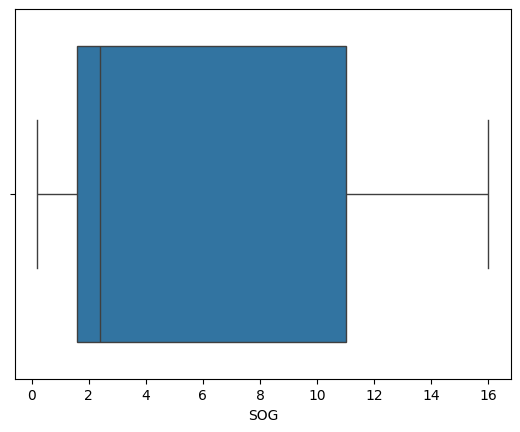

In [10]:
sns.boxplot(x=df['SOG'])
plt.show()

In [11]:
#No OUTLIERs

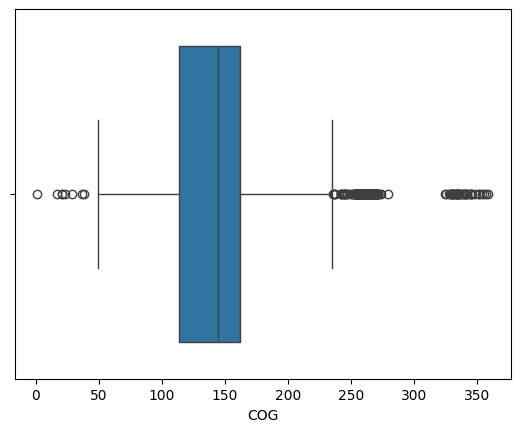

In [12]:
sns.boxplot(x=df['COG'])
plt.show()

In [13]:
#oUTLIERS DETECTED

In [14]:
df.columns

Index(['MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG', 'Heading', 'Status',
       'Draft'],
      dtype='object')

In [15]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest

In [24]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.5, random_state=42)
df['BaseDateTime'] = df['BaseDateTime'].astype('int64') // 10**9  
model.fit(df[['LAT', 'LON', 'SOG', 'COG', 'Heading', 'Status', 'Draft']])
print(model.get_params())


{'bootstrap': False, 'contamination': 0.5, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [25]:
df['scores'] = model.decision_function(df[['LAT', 'LON', 'SOG', 'COG', 'Heading', 'Status', 'Draft']])
df['anomaly_score'] = model.predict(df[['LAT', 'LON', 'SOG', 'COG', 'Heading', 'Status', 'Draft']])

anomalies = df[df['anomaly_score'] == -1]
print(anomalies.head())


        MMSI  BaseDateTime       LAT        LON   SOG    COG  Heading  Status  \
0  538007181             0  32.61859 -118.21503  10.7  255.5    255.0     0.0   
1  538007181             0  32.61773 -118.21916  10.9  253.7    255.0     0.0   
2  538007181             0  32.61685 -118.22330  10.9  257.2    255.0     0.0   
3  538007181             0  32.61617 -118.22657  11.0  256.0    255.0     0.0   
4  538007181             0  32.61526 -118.23072  10.9  256.2    255.0     0.0   

   Draft    scores  anomaly_score  
0   13.7 -0.080663             -1  
1   13.7 -0.085569             -1  
2   13.7 -0.076632             -1  
3   13.7 -0.084551             -1  
4   13.7 -0.075578             -1  


In [26]:
df['anomaly_score'].value_counts()

unique_values = df['anomaly_score'].unique()


In [27]:
unique_values

array([-1,  1])

In [28]:
print(df['anomaly_score'].value_counts())

anomaly_score
 1    1259
-1    1258
Name: count, dtype: int64


In [29]:
anomaly_count = df['anomaly_score'].tolist().count(-1)

accuracy = 100 * anomaly_count / len(df)

print("Accuracy of the model:", accuracy)


Accuracy of the model: 49.980135081446164
